# Extract real erosion rate, and apparent erosion rates from continental and submarine sediments 10Be concentration

In [43]:
import h5py
import badlands_companion.cosmoAnalyse as Cosmo
from badlands import cosmoProd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
dt       = 1000
numsteps = 100
maxtime  = numsteps*dt
lat      = 40

# output folder where to extract values
folder     = '/mnt/d/SPM/Output/Alpsmodel/h5/'
fname      = 'figA.jpg'

# calls instance for analyzing 10Be outputs
extr       = Cosmo.cosmoAnalyse(folder,numsteps,dt)
cosmo      = cosmoProd.cosmoProd(lat)   
temps      = np.linspace(0,maxtime,numsteps)

In [45]:
# short function to read xyz data file, the 3rd column is the point ID where we want to extract the data
def read_datafile(filen):
    listdata=[]
    k     = open(filen,'r')
    lins = k.readlines()
    for element in lins:
        temp = element.split()
        listdata.append(int(temp[2]))
    k.close()
    return listdata

In [46]:
# area of 10Be production in the crystalline massif
xmin = 50000
xmax = 105000
ymin = 30000
ymax = 90000

# alternatively, reads list of the point IDs
filen = '../Data/All_points.txt'
listbedrock = read_datafile(filen)

## area of 10Be sampling in deep sea fan sediments
xminb = 1000
xmaxb = 7000
yminb = 12000
ymaxb = 19000

##area of 10Be sampling in Var delta (if any)
#xminb = 25000
#xmaxb = 29000
#yminb = 42000
#ymaxb = 50000

##area of 10Be sampling in the submarine slope (if any)
#xminb = 12000
#xmaxb = 17000
#yminb = 38000
#ymaxb = 45000

# alternatively, list of the point IDs in the basin
#filen = '../Data/Var_pts.txt'
#listarea = read_datafile(filen)

In [47]:
# First extracts real and in-situ produced sediments signatures
realE,apparentE     = extr.extract_denud_Be_time(lat,xmin,xmax,ymin,ymax)

In [48]:
# Then extracts average 10Be concentration in sediments
depoBe,apparentE_basin  = extr.extract_Be_deposition(lat,xmin,xmax,ymin,ymax,xminb,xmaxb,yminb,ymaxb)
isnull = np.where(apparentE_basin <=0.)[0]
apparentE_basin[isnull] = np.nan

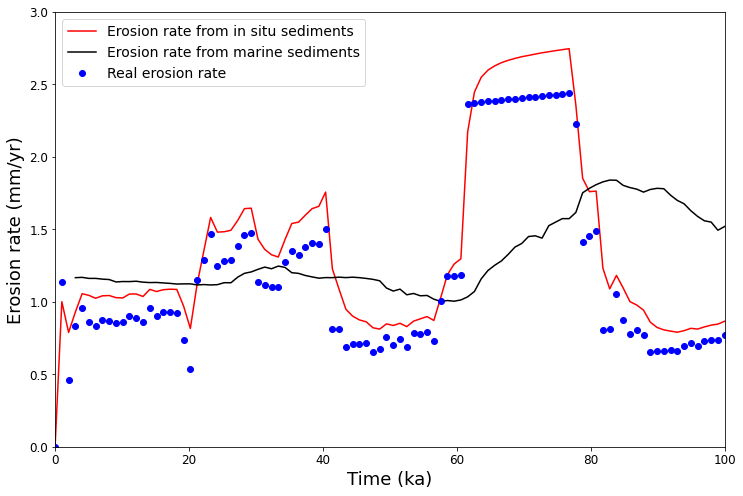

In [49]:
# Plots figure
plt.figure(figsize=(12,8))
plt.rc('font', size=12) 
plt.plot(temps/1000,apparentE*1000,'r',label='Erosion rate from in situ sediments')
plt.plot(temps/1000,apparentE_basin*1000,'k',label='Erosion rate from marine sediments')
plt.plot(temps/1000,realE*1000,'bo',label='Real erosion rate')

#plt.plot(temps,meanero,'k')
plt.legend(fontsize=14)
plt.axis([0, numsteps, 0, 3.])
plt.xlabel('Time (ka)',fontsize=18)
plt.ylabel('Erosion rate (mm/yr)',fontsize=18)

#plt.savefig(fname, dpi=300)
plt.show()